Import Data

In [ ]:
import pandas as pd
from pandas import read_csv # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data =read_csv('/content/drive/My Drive/Colab Notebooks/Telco.csv', index_col="customerID")
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


EDA

In [ ]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


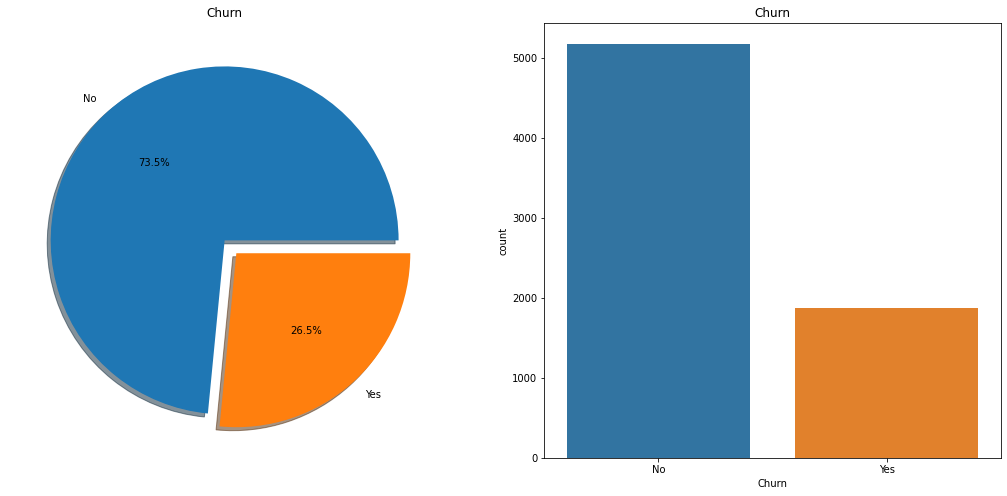

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Churn')
ax[0].set_ylabel('')
sns.countplot('Churn',data=data,ax=ax[1])
ax[1].set_title('Churn')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


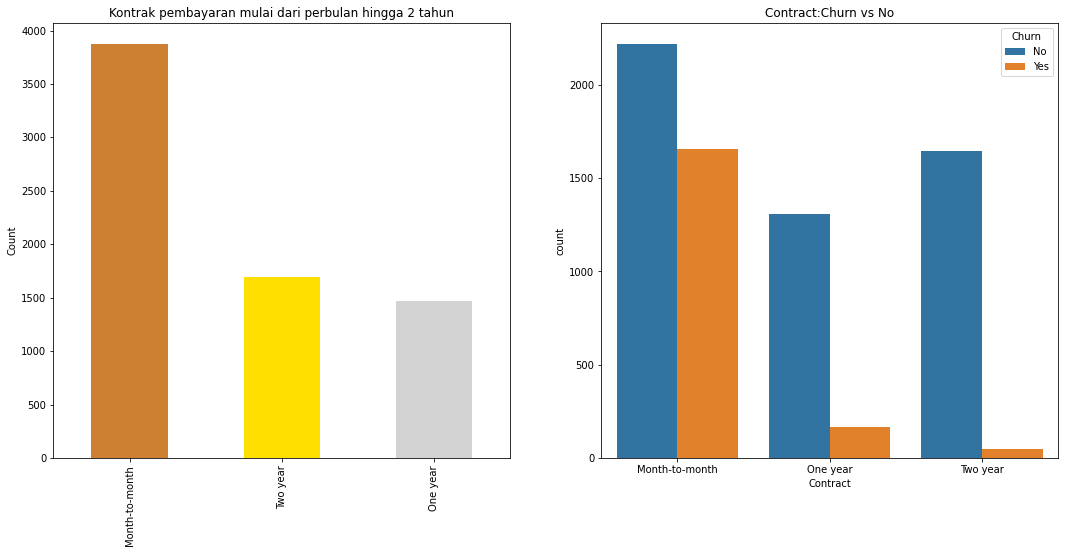

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Contract'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Kontrak pembayaran mulai dari perbulan hingga 2 tahun')
ax[0].set_ylabel('Count')
sns.countplot('Contract',hue='Churn',data=data,ax=ax[1])
ax[1].set_title('Contract:Churn vs No')
plt.show()

Train_Test Split

In [ ]:
from sklearn.model_selection import train_test_split
data.drop(columns=["gender","TotalCharges","PaperlessBilling","Contract","Partner",
                   "SeniorCitizen","Dependents","PhoneService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport"], inplace=True)

In [ ]:
x = data.drop(columns="Churn")
y = data.Churn

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5634, 7), (1409, 7), (5634,), (1409,))

Preprocessing

###Preprosesor

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
numerical_pipeline = Pipeline([
              ("imputer", SimpleImputer(strategy="mean")),
              ("scaler", MinMaxScaler())
])
categorical_pipeline = Pipeline([
              ("imputer", SimpleImputer(strategy="most_frequent")),
              ("onehot", OneHotEncoder())                  
])

In [ ]:
from sklearn.compose import ColumnTransformer
preprocesor = ColumnTransformer([
                ("numeric", numerical_pipeline,["tenure","MonthlyCharges"]),
                ("categoric", categorical_pipeline,["MultipleLines","InternetService","StreamingTV","StreamingMovies"])        
                ])

**Model Gradient Boosting Mechine** 



##Pipeline

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = Pipeline([
            ("prep", preprocesor),
            ("algo", GradientBoostingClassifier())
])

In [ ]:
model.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['MultipleLines',
                         

Test Data

In [ ]:
y_pred=model.predict(x_test)
print("Prediksi Data Uji: ",y_pred)

Prediksi Data Uji:  ['No' 'No' 'No' ... 'No' 'No' 'Yes']


In [ ]:
y_predi=model.predict(x_train)
print("Prediksi Data Uji: ",y_predi)

Prediksi Data Uji:  ['No' 'Yes' 'No' ... 'Yes' 'No' 'No']


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_predi)

array([[3773,  366],
       [ 700,  795]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_predi))

              precision    recall  f1-score   support

          No       0.84      0.91      0.88      4139
         Yes       0.68      0.53      0.60      1495

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, model.predict_proba(x)[:, 1])

0.8542243050458284

In [ ]:
x.iloc[0:1]

,tenure,MultipleLines,InternetService,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges
customerID,,,,,,,
7590-VHVEG,1,No phone service,DSL,No,No,Electronic check,29.85


In [ ]:
data = [[45,"No phone service", "DSL","Yes","No","Electronic check" ,30],
[1,"Yes", "Fiber optic","No","No","Bank transfer (automatic)" ,29.30]] 
y_predic=pd.DataFrame(data, index=[12,13], columns=x.columns)
y_predic

,tenure,MultipleLines,InternetService,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges
12,45,No phone service,DSL,Yes,No,Electronic check,30.0
13,1,Yes,Fiber optic,No,No,Bank transfer (automatic),29.3


In [ ]:
y_predic["Churn"] = end.predict(y_predic) 
y_predic

,tenure,MultipleLines,InternetService,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges,Churn
12,45,No phone service,DSL,Yes,No,Electronic check,30.0,No
13,1,Yes,Fiber optic,No,No,Bank transfer (automatic),29.3,Yes
